# Plotting with Python
This is the corresponding Jupyter Notebook part to the EBC Python Tutorial section Advanced concepts/Create plots
## Configuring the plot layout
In the first few sections we told you to take some time to set up your figures. Instead of altering the rcParams file directly, we would suggest, that you create a dictionary of values that you would like to alter and call this explicitly for your plots. There are a lot more parameters in the rcParams file, but you can probably stick with the default values.

Below are the definitions for several different variations and an example why it is great to use them.

<IPython.core.display.Javascript object>


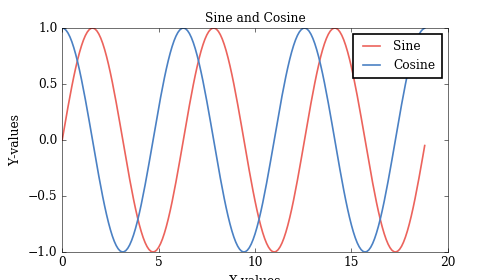

<IPython.core.display.Javascript object>


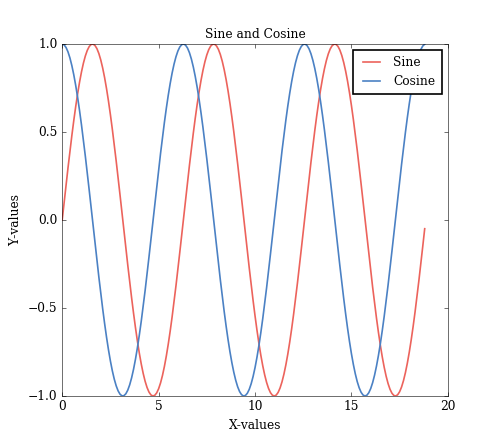

<IPython.core.display.Javascript object>


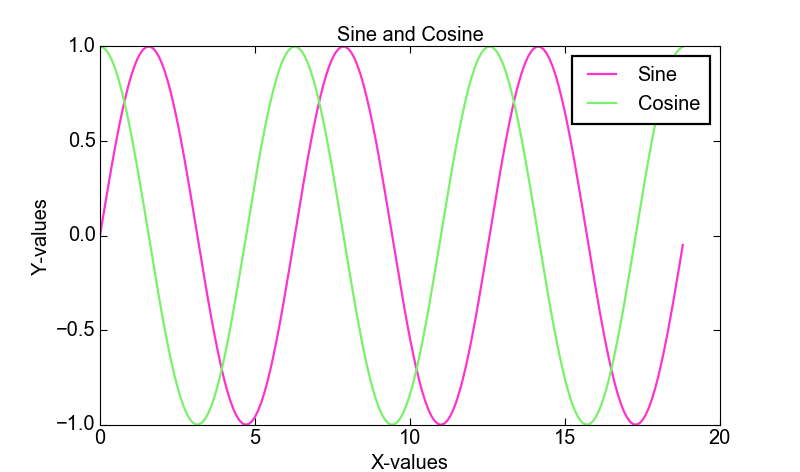

In [1]:
%matplotlib notebook
from cycler import cycler
import numpy as np
import pandas as pd
import pylab as plt
latex_base = {'figure.figsize'   : [6.220,3.5]    # figure size in inches
                ,'figure.dpi'       : 80      # figure dots per inch
                # Eigenschaften der Achsen
                ,'axes.linewidth'      : 0.5     # edge linewidth
                ,'axes.grid'           : False   # display grid or not
                ,'axes.titlesize'      : 11.0   # fontsize of the axes title
                ,'axes.labelsize'      : 11.0  # fontsize of the x any y labels
                ,'axes.prop_cycle'    : (cycler('color',['#EC635C', '#4B81C4', '#F49961', '#8768B4', '#B45955','#CB74F4','#6EBB96']))  # color cycle for plot lines
                # Eigenschaften der Tick-Marker
                ,'xtick.labelsize'      : 11.0 # fontsize of the tick labels
                ,'ytick.labelsize'      : 11.0 # fontsize of the tick labels
                # Eigenschaften der Linienplots
                ,'lines.linewidth'   : 1.5     # line width in points
                ,'lines.linestyle'   : '-'       # solid line
                ,'lines.marker'      : None    # the default marker
                ,'lines.markeredgewidth'  : 1.5     # the line width around the marker symbol
                # Eigenschaften der Flächen
                ,'patch.linewidth'        : 1.5     # edge width in points
                ,'patch.facecolor'        : '#EC635C'
                ,'patch.edgecolor'        : '#EC635C'
                # Eigenschaften der Legende
                ,'legend.fontsize'      : 11.0
                ,'legend.borderpad'     : 0.5    # border whitespace in fontsize units
                ,'legend.markerscale'   : 1.0    # the relative size of legend markers vs. original
                ,'legend.frameon'       : True   # whether or not to draw a frame around legend
                # Eigenschaften der Schriften
                ,'font.family'         : 'serif'
                ,'font.stretch'        : 'normal'
                ,'font.size'           : 11.0
                ,'font.sans-serif'     : ['Arial', 'Helvetica','sans-serif']
                # Eigenschaften fürs Speichern
                ,'savefig.dpi'         : 600      # figure dots per inch
                ,'savefig.format'      : 'pdf'      # png, ps, pdf, svg
                }

# Create another dictionary from the old one for larger figures.
latex_twothird = latex_base.copy() # You need to use the copy method, otherwise you will alter both dictionaries
latex_twothird['figure.figsize'] = [6.220, 5.5]

# And one for fullsize figures
latex_fullpage = latex_base.copy()
latex_fullpage['figure.figsize'] = [6.220, 7.87]

# And here is one for Powerpoint presentations with fancy colors. Note that the save-format is also changed from pdf (which is
# vecorized and thus great for use in latex) to png because older version of PowerPoint can not handle pdfs
pp_figure = latex_base.copy()
pp_figure['axes.prop_cycle'] = (cycler('color',['#ff33cc', '#79f169', '#F49961', '#8768B4', '#B45955','#CB74F4','#6EBB96']))  # color cycle for plot lines
pp_figure['figure.figsize'] = [10,5.91]    # figure size in inches
pp_figure['axes.linewidth'] = 1     # edge linewidth
pp_figure['axes.titlesize'] =  18.0   # fontsize of the axes title
pp_figure['axes.labelsize'] = 18.0  # fontsize of the x any y labels
pp_figure['xtick.major.size'] = 6      # major tick size in points
pp_figure['xtick.minor.size'] = 3      # minor tick size in points
pp_figure['xtick.major.width'] = 1    # major tick width in points
pp_figure['xtick.minor.width'] = 1    # minor tick width in points
pp_figure['xtick.labelsize'] = 18.0 # fontsize of the tick labels
pp_figure['ytick.major.size'] = 6      # major tick size in points
pp_figure['ytick.minor.size'] = 3      # minor tick size in points
pp_figure['ytick.major.width'] = 1    # major tick width in points
pp_figure['ytick.minor.width'] = 1    # minor tick width in points
pp_figure['ytick.labelsize'] = 18.0 # fontsize of the tick labels
pp_figure['lines.linewidth'] = 2     # line width in points
pp_figure['lines.markeredgewidth'] = 2     # the line width around the marker symbol
pp_figure['lines.markersize'] = 8            # markersize, in points
pp_figure['patch.linewidth'] = 2.0     # edge width in points
pp_figure['legend.fontsize'] = 18.0
pp_figure['font.size'] = 18.0
pp_figure['font.family'] = 'sans-serif'
pp_figure['savefig.dpi'] = 150      # figure dots per inch
pp_figure['savefig.format'] = 'png'      # png, ps, pdf, svg

def create_plot(): 
    #Yes, this function plots several things in one and it does not seperate layout form content creation
    # - but this function will not be used for anything else, so this is fine here.
    #Generate some  Data
    x = np.arange(0,6*np.pi, 0.1)
    y1 = np.sin(x)
    y2 = np.cos(x)
    
    #create output
    fig, ax = plt.subplots()
    plt.plot(x,y1)
    plt.plot(x,y2)
    ax.set_title('Sine and Cosine')
    ax.set_xlabel('X-values')
    ax.set_ylabel('Y-values')
    leg = ax.legend(['Sine', 'Cosine'])
    return fig, ax, leg
             
# Set dictionaries and plot results
plt.rcParams.update(latex_base)
fig1, ax1, leg1 = create_plot()
plt.rcParams.update(latex_twothird)
fig2, ax2, leg2 = create_plot()
plt.rcParams.update(pp_figure)
fig3, ax3, leg3 = create_plot()


Quite obviously you can easily change the appearance of your figure without too much trouble if you set up your layout dictionaries before.
We would suggest to

- keep three Latex dictionaries, one for figures a bit smaller than half the textheight of your doccument, to allow the placement of two figures on one page, one larger figure if you need some more space for your plot but where text still fits beneath and one full size figure
- One dictionary for Powerpoint presentations. Make the lines a bit thicker, increase the font size (16pt is EBC minimum for presentations!), use beamer save, saturated colores (i.e. Not the green in the figure above)

You may have realized that the frame around the legend is to thick compared to the axes. This is because as of now there is no rcParams value for this (this may be changed with release of matplotlib 2.0). You can use this piece of code to fix this:

``` python
frame = leg.get_frame()
axes_linewidth = ax.spines['bottom']
frame.set_linewidth(axes_linewidth._linewidth)
```

with ax and leg beeing the correct handles to your axes and legend artist. This corrections is automatically applied if you use our ebcplot-tools and saving methods (more on this later on).

<IPython.core.display.Javascript object>


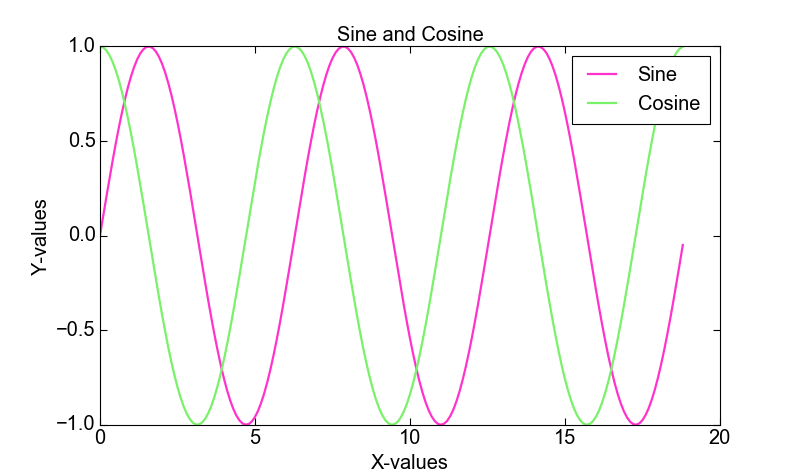

In [2]:
fig, ax, leg = create_plot()
frame = leg.get_frame()
axes_linewidth = ax.spines['bottom']
frame.set_linewidth(axes_linewidth._linewidth)

Notice that applying this code is easily possible because our plotting function returned the figure, axes and legend handles of our plots.

## Ensure the reusability of plots
In this section we will show some examples how you should design your functions to create figures. This will ensure that a reonfiguration can be done easily later on.

As an idea, we try to plot three different data sets and try to point out the adavantages of an intelligent plotting approach. But first, let as create our three datasets:

In [4]:
% matplotlib notebook
import numpy as np
import pylab as plt
x = np.arange(0,3,0.1)
y1 = np.e ** x
y2 = (np.e ** x) + (np.e * x) * (np.random.ranf(len(x)) * 2 -1) / 5. # Same function with some random deviations
y3 = (np.e ** x) + (np.e * x) * (np.random.ranf(len(x)) * 2 -1) / 10.



The worst thing you could do right now would be a simple function that just creates your whole plot. It will work, maybe more effortless than with a more sophisticated approach, but you'll run into problems if you would like to alter something of your code.



<IPython.core.display.Javascript object>


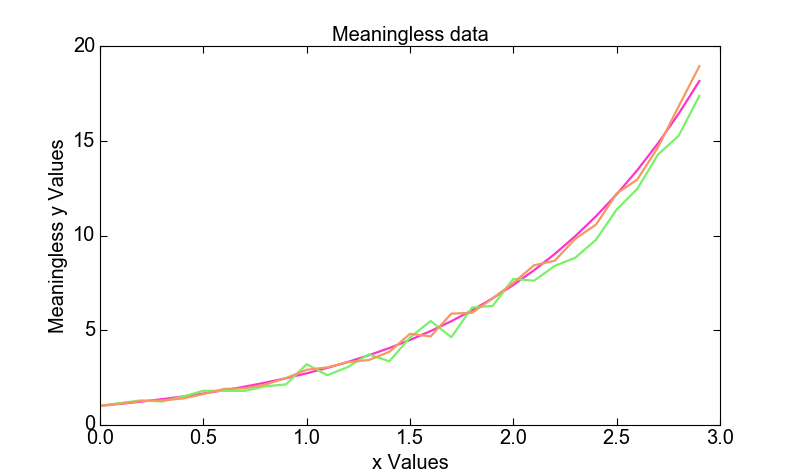

In [5]:
def plot_complete_figure():
    fig, ax = plt.subplots()
    ax.plot(x,y1)
    ax.plot(x,y2)
    ax.plot(x,y3)
    ax.set_xlabel('x Values')
    ax.set_ylabel('Meaningless y Values')
    ax.set_title('Meaningless data')

plot_complete_figure()

Obviously, that code works fine, if you want more or less data, you could add those or comment them.

Using a reusable method, the code would look like this:

<IPython.core.display.Javascript object>


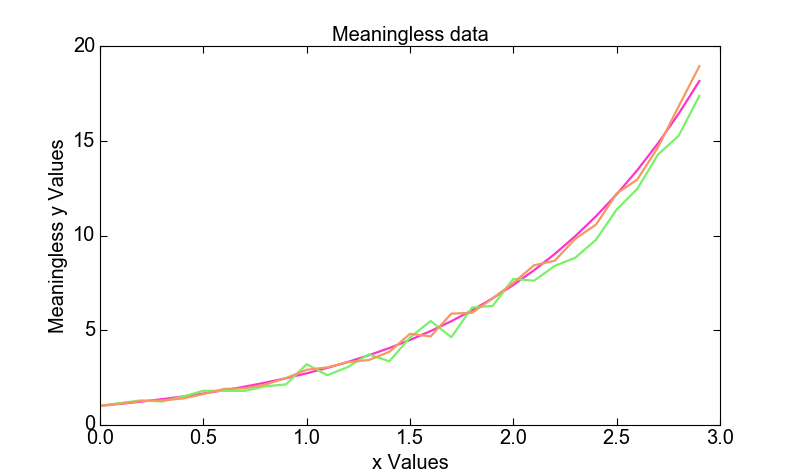

In [6]:
def plot_func(data_x, data_y, axes_handle):
    axes_handle.plot(data_x, data_y)
    axes_handle.set_xlabel('x Values')
    axes_handle.set_ylabel('Meaningless y Values')
    axes_handle.set_title('Meaningless data')

fig, ax = plt.subplots()
plot_func(x,y1, ax)
plot_func(x,y2, ax)
plot_func(x,y3, ax)


It does not seem to make a difference, maybe the first method is even simpler. But if you want to change the layout, or try something different, it gets more difficult to change that with the "does everything" code. For example if you try to plot the first value as a reference and compare them side by side. Using the first version, you would have to completely rewrite your function, otherwise it would not work.

<IPython.core.display.Javascript object>


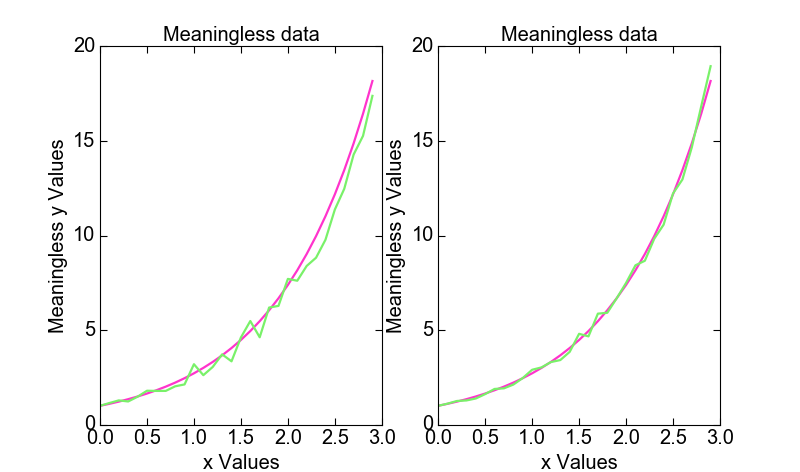

<IPython.core.display.Javascript object>


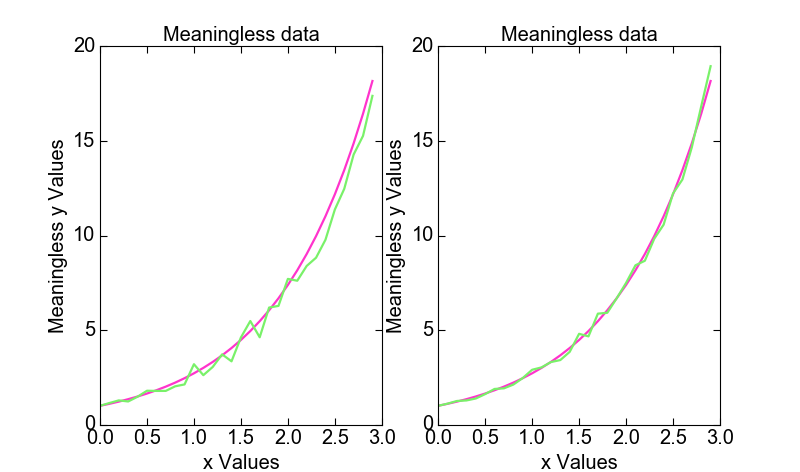

In [7]:
# Rewriting  version 1
def plot_complete_figure_side_by_side():
    fig, ax = plt.subplots(1,2)
    ax[0].plot(x,y1)
    ax[0].plot(x,y2)
    ax[1].plot(x,y1)
    ax[1].plot(x,y3)
    for a in ax:
        a.set_xlabel('x Values')
        a.set_ylabel('Meaningless y Values')
        a.set_title('Meaningless data')

plot_complete_figure_side_by_side()

# Reusing version 2
fig, ax = plt.subplots(1,2)
plot_func(x,y1, ax[0])
plot_func(x,y2, ax[0])
plot_func(x,y1, ax[1])
plot_func(x,y3, ax[1])

Separating the content creation from the layout and breaking plotting down into reusable functions can save you time. Although the advantages of this example may not be overwhelming, with respect to object oriented programming or more complex methods, the advantages increase. Especially if you have several plotting methods and you want to compare them side-by-side. If your function always creates a whole figure this is not easily possible, but if you first create an axes grid as needed and than fill every axes with the plotting function of your choice, you are very flexible what you can show.

If you want to compose a figure out of different plots, we would encourage you to do this directly in Python and not stitch them together afterwards in LaTeX, because this will again result in badly scaled fonts and lines. Matplotlib provides several [grid methods](http://matplotlib.org/api/gridspec_api.html#matplotlib.gridspec.GridSpec) to assist you to create good looking multi-plots.


Imagine a plotting function that does some calculations beforehand and plots the result. If you need the results of the calculation, they are lost. If you had written two functions, one for the calculations, a second one for the plotting, you could use the first function to retrieve the results and use them for some other stuff, e.g. a table, than just plotting. Remember: A function should do only __one__ thing.